#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('E:\Downloads\Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [196]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [197]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [198]:
df.shape

(148654, 13)

In [199]:
 df.describe(include='float')

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Notes,Status
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,0.0,0.0
mean,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,NaN,NaN
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,NaN,NaN
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,NaN,NaN
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,NaN,NaN
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,NaN,NaN
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,NaN,NaN
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,NaN,NaN


In [200]:
df.TotalPayBenefits.sum()

13927773042.81

In [201]:
#calculate the range
df1=df.select_dtypes('float').columns
df[df1].max()-df[df1].min()

BasePay             319441.02
OvertimePay         245131.89
OtherPay            407242.84
Benefits             96604.55
TotalPay            568213.56
TotalPayBenefits    568213.56
Notes                     NaN
Status                    NaN
dtype: float64

In [174]:
df.mode().head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,0.0,7959.18,2014.0,NaN,San Francisco,NaN


## Data Cleaning

In [202]:
#find missing value
df.isnull().sum()/len(df)*100

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64

In [203]:
Q1=11535.395000
Q3=35566.855000
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ul,ll)

71614.04500000001 -24511.795000000002


In [204]:
# 1 drop columns notes and Status because they're all null.
# 2 fill columns Benefits and BasePay by median because there are outlier.
df.drop(['Notes','Status'],axis=1,inplace=True)
df['Benefits'].fillna(df['Benefits'].median(),inplace=True)
df['BasePay'].fillna(df['BasePay'].median(),inplace=True)

In [205]:
#Drop missing value form cloumn Overtimepay and OtherPay Because 4 values are very few and will not affect on the data.
df=df.dropna()

In [220]:
df.isnull().sum()/len(df)*100

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Agency              0.0
dtype: float64

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148650 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148650 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [208]:
df.groupby(["EmployeeName"])[['TotalPayBenefits','Benefits','OvertimePay']].sum().reset_index().sort_values(by='TotalPayBenefits',ascending=False)


,EmployeeName,TotalPayBenefits,Benefits,OvertimePay
57981,Kevin Lee,1778487.17,459719.54,132464.92
99037,Steven Lee,1706550.76,445934.16,78875.91
108484,William Wong,1459954.17,361887.36,157767.41
98149,Stanley Lee,1457279.68,324301.18,200313.50
88749,Richard Lee,1268668.84,323671.17,88888.02
...,...,...,...,...
16632,Charlene D Mccully,0.00,0.00,0.00
103252,Timothy E Gibson,-2.73,-2.73,0.00
71253,Mark E Laherty,-8.20,-8.20,0.00
24296,David P Kucia,-33.89,-33.89,0.00


In [210]:
df.groupby(["JobTitle"])[['TotalPayBenefits','Benefits'
         ,'OvertimePay','TotalPay']].sum().reset_index().sort_values(by='Benefits',ascending=False)

,JobTitle,TotalPayBenefits,Benefits,OvertimePay,TotalPay
2055,Transit Operator,6.477816e+08,1.924740e+08,78403983.45,4.553076e+08
1576,Registered Nurse,5.665697e+08,1.343123e+08,15709284.39,4.322574e+08
816,Firefighter,4.319727e+08,8.783758e+07,66931108.48,3.441351e+08
1481,Police Officer 3,4.060903e+08,7.948074e+07,39748129.59,3.266096e+08
2007,TRANSIT OPERATOR,1.474414e+08,6.836514e+07,27082442.42,1.474414e+08
...,...,...,...,...,...
1541,Public Service Aide-Technical,2.774270e+03,2.217200e+02,0.00,2.552550e+03
515,Conversion,3.361440e+03,0.000000e+00,0.00,3.361440e+03
436,Cashier 3,2.074600e+03,0.000000e+00,0.00,2.074600e+03
427,"Captain, (Fire Department)",3.533278e+04,0.000000e+00,0.00,3.533278e+04


In [212]:
df.groupby(["JobTitle"])[['TotalPayBenefits','Benefits'
         ,'OvertimePay','TotalPay']].mean().reset_index().sort_values(by='TotalPay',ascending=False)

,JobTitle,TotalPayBenefits,Benefits,OvertimePay,TotalPay
831,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000,28628.620000,0.0,399211.275000
466,Chief Investment Officer,436224.360000,96570.660000,0.0,339653.700000
474,Chief of Police,411732.266667,82548.620000,0.0,329183.646667
475,"Chief, Fire Department",408865.326667,82893.643333,0.0,325971.683333
586,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000,28628.620000,0.0,307899.460000
...,...,...,...,...,...
1415,PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,149.510000,28628.620000,0.0,149.510000
499,"Commissioner 16.700c, No Pay",7827.455600,7801.695600,0.0,25.760000
661,Drug Court Coordinator,7959.180000,7959.180000,0.0,0.000000
975,IS Technician Assistant,7959.180000,7959.180000,0.0,0.000000


In [184]:
df.Year.value_counts()

2014    38119
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

# Data Visualization

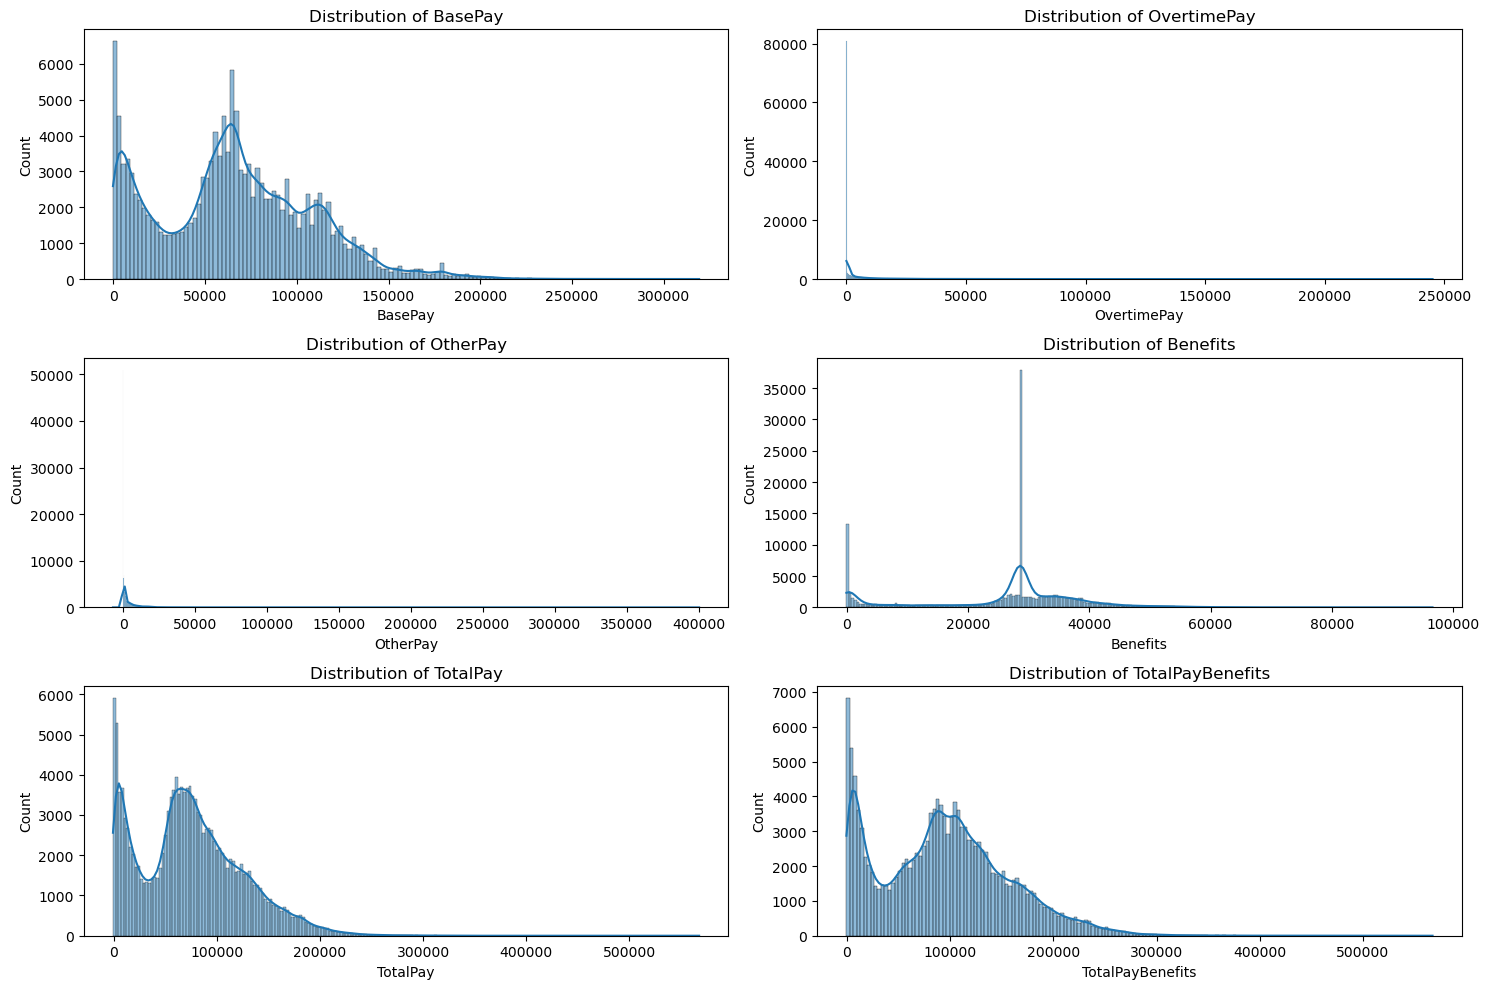

In [214]:
x=df.select_dtypes('float').columns
plt.figure(figsize=(15,10))
for e,i in enumerate(x):
    plt.subplot(3,2,e+1)
    sns.histplot(x=df[i],kde=True)
    plt.title(f'Distribution of {i}')
    plt.tight_layout()

In [242]:
#Group float columns by years
g = df.groupby('Year').sum()
g

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
Year,,,,,,,
2011,653754720,2.299566e+09,1.638388e+08,1.307901e+08,1.035182e+09,2.594195e+09,2.594195e+09
2012,2005309555,2.405835e+09,1.846910e+08,1.343223e+08,9.720918e+08,2.724848e+09,3.696940e+09
2013,3449541971,2.615710e+09,1.986214e+08,1.436538e+08,8.961163e+08,2.918656e+09,3.814772e+09
2014,4939879336,2.537369e+09,2.059186e+08,1.336232e+08,9.449548e+08,2.876911e+09,3.821866e+09


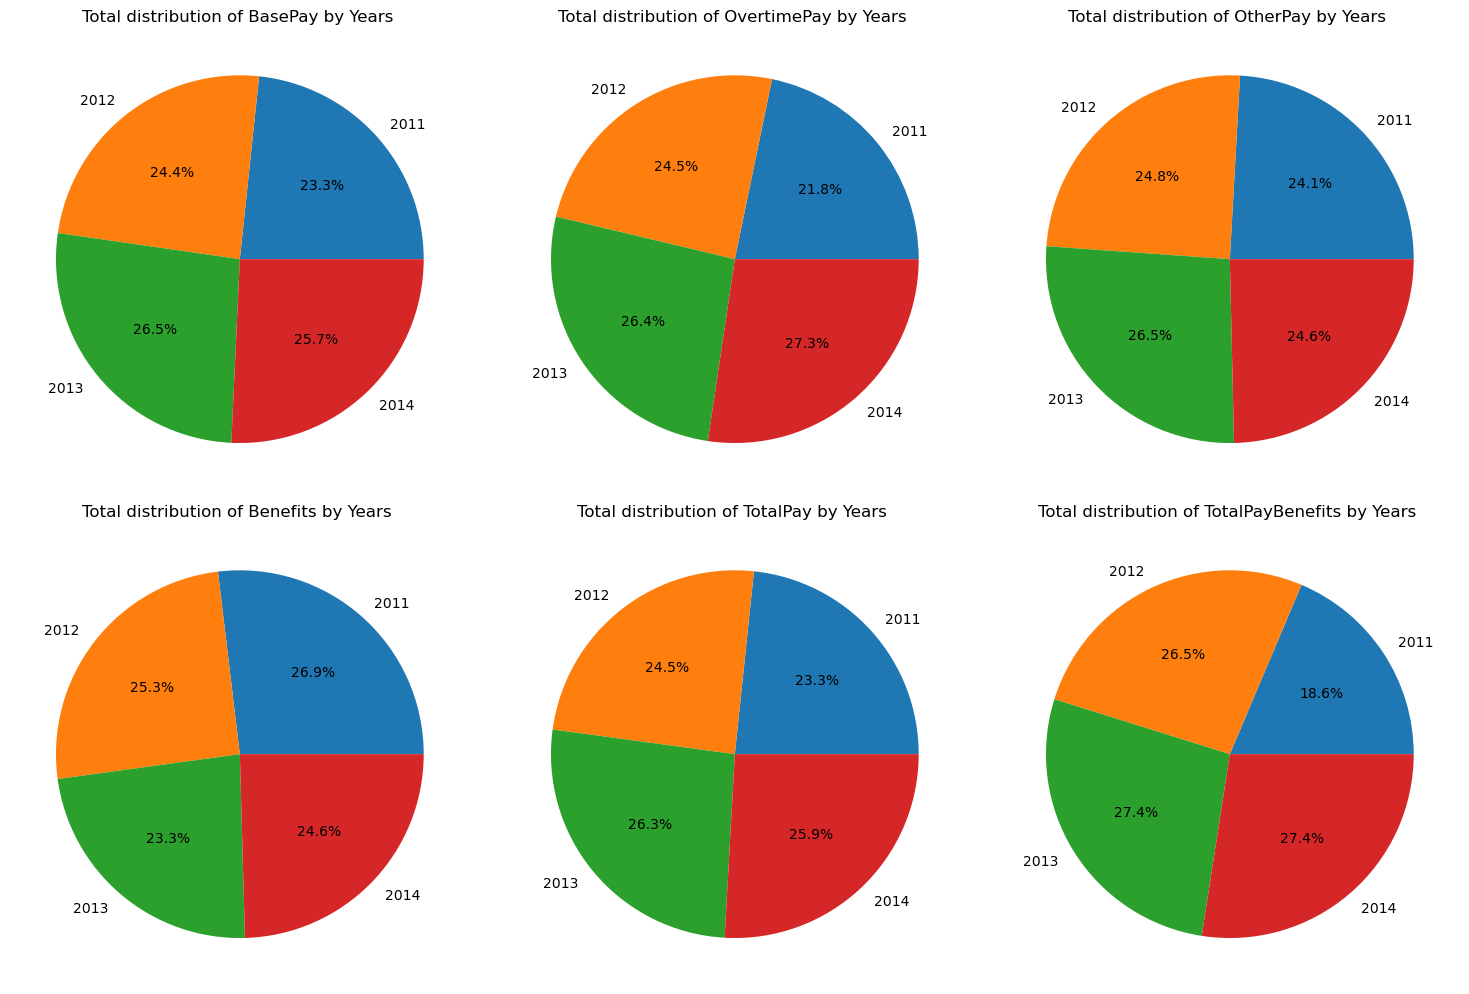

In [243]:
col=g.select_dtypes('float').columns
plt.figure(figsize=(15,15))
for e,i in enumerate(col):
    plt.subplot(3,3,e+1)
    plt.pie(g[i],labels=g.index,autopct="%1.1f%%")
    plt.title(f'Total distribution of {i} by Years ')
    plt.tight_layout()

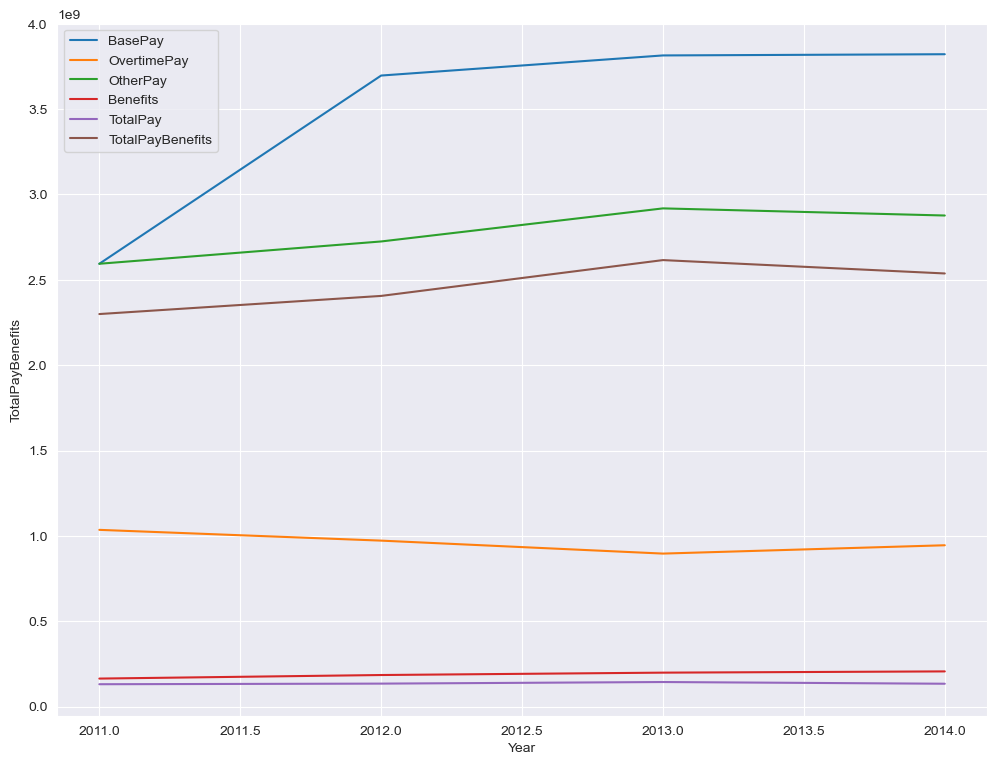

In [266]:
plt.figure(figsize=(12,9))
sns.set_style('darkgrid')
sns.lineplot(x=g.index,y=g.TotalPayBenefits,legend=True);
sns.lineplot(x=g.index,y=g.Benefits,legend=True);
sns.lineplot(x=g.index,y=g.TotalPay,legend=True);
sns.lineplot(x=g.index,y=g.OvertimePay,legend=True);
sns.lineplot(x=g.index,y=g.OtherPay,legend=True);
sns.lineplot(x=g.index,y=g.BasePay,legend=True);
plt.legend(g.select_dtypes('float'))

In [221]:
df.groupby('Year')[df.select_dtypes('float').columns].mean()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
Year,,,,,,
2011,63595.956517,4531.065429,3617.081926,28628.620000,71744.103871,71744.103871
2012,65436.406857,5023.417824,3653.437583,26439.966967,74113.262265,100553.229232
2013,69555.662801,5281.641980,3819.969007,23829.076572,77611.443142,101440.519714
2014,66564.421924,5401.993737,3505.421251,24789.601756,75471.836912,100261.438668


In [270]:
df.groupby('JobTitle')[df.select_dtypes('float').columns].mean().sort_values(by='Benefits',ascending=False).head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
JobTitle,,,,,,
Chief Investment Officer,257340.000000,0.0,82313.700000,96570.660000,339653.700000,436224.360000
"Gen Mgr, Public Trnsp Dept",297769.413333,0.0,0.000000,82927.026667,297769.413333,380696.440000
"Chief, Fire Department",304232.340000,0.0,21739.343333,82893.643333,325971.683333,408865.326667
Chief of Police,309767.683333,0.0,19415.963333,82548.620000,329183.646667,411732.266667
Mayor,275852.530000,0.0,0.000000,78360.376667,275852.530000,354212.906667


In [271]:
df.groupby('JobTitle')[df.select_dtypes('float').columns].mean().sort_values(by='Benefits').head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
JobTitle,,,,,,
Conversion,0.000000,0.0,3361.44,0.000000,3361.440000,3361.44000
"Captain, (Fire Department)",65007.450000,0.0,35332.78,0.000000,35332.780000,35332.78000
Cashier 3,0.000000,0.0,2074.60,0.000000,2074.600000,2074.60000
"Sr Cnselor, Juv Hall (SFERS)",31491.030000,0.0,80.20,0.000000,31571.230000,31571.23000
"BdComm Mbr, Grp5,M$100/Mo",1216.390602,0.0,0.00,58.436867,1216.390602,1274.82747


In [223]:
df['TotalPayBenefits'].corr(df['BasePay'])

0.9431931722277328

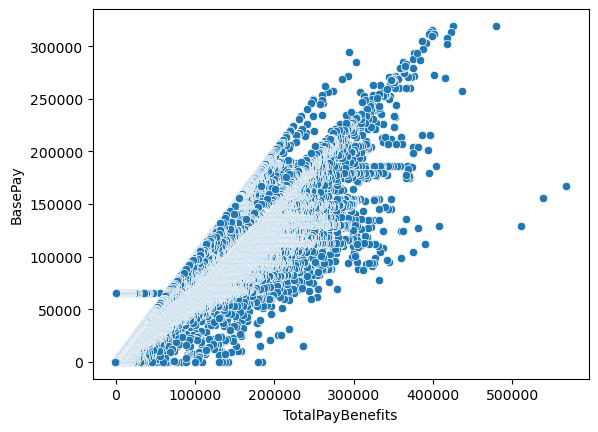

In [224]:
sns.scatterplot(data=df,x='TotalPayBenefits',y='BasePay');

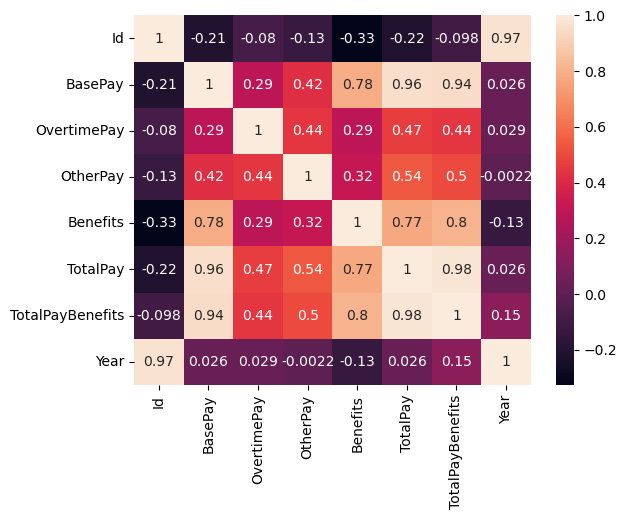

In [194]:
sns.heatmap(df.corr(),annot=True);

##### Summary of Insights 
1. After clarifying the data I found that the job that people work for the most is Transit Operator.

2. and it is also the job that brings in the most profits.

3. the job that has the most on average profits is the job of Chief Investment Officer, but General Manger Metropolitan Transit Authority is the job that has the most on average total pay without profits.

4. also through analysis I found that the percentage Most people receive salaries in the range of 50,000 to 200,000, and the percentage of profits is more than 20,000 to 40,000.

5. I also found that the average profits and the average BasePay and totalPay are close between the years.

6. There is also a strong relationship between Base Pay and Total pay with benefits.

7. The job with the lowest average benefits is Conversion, Captain fire department, cashier3, SR Cnselor, Jav Hall(SFERS) with 0 benefits.

8. The job with the lowest average salary and benefits is Puplic Safety Communications Technican